# Framework Guide to observe and compare pipelines

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from visualize_best import results_to_pd, filter_results, plot_multiple_subplots, plot_subplots, compute_weighted_avg
%matplotlib inline

In [3]:
subgraph_sizes = range(3, 15)
weights_list = [1149, 1091, 1034, 976, 919, 861, 803, 748, 696, 645, 593, 542]
recruiting_weights = dict(zip(subgraph_sizes, weights_list))

weights_list = [59308, 53543, 47268, 40973, 34682, 28407, 22611, 17581, 13292, 9751, 7168, 5259]
bpi_weights = dict(zip(subgraph_sizes, weights_list))

weights_list = [2310, 2189, 2008, 1822, 1637, 1464, 1293, 1165, 1049, 936, 835, 740]
p2p_weights = dict(zip(subgraph_sizes, weights_list))

## Load prediction results for downstream task

In [4]:
# Specify the root directory where your CSV files are stored
filename = 'BPI2017-Final'
root_dir = f"results/exp_1/{filename}"
# Prediction task to observce
prediction_task = "remaining_time"

results_df = results_to_pd(root_dir, prediction_task)
results_df.head()

,subgraph_size,graph_layer,embedding_size,node_features,prediction_layer,score
0,10,FGSD,16,False,Linear models,5.488371
1,10,FGSD,16,False,Random forest models,4.513496
2,10,FGSD,16,False,SK MLP models,5.753733
3,10,FGSD,16,False,XGB models,4.567213
4,10,FGSD,32,False,Linear models,5.311714


## Global Table for pipeline comparison on all OCELs

In [5]:
filename = 'recruiting-ocel1'
root_dir = f"results/exp_1/{filename}"
embedding_size = 32

recruiting_average_scores = compute_weighted_avg(root_dir, prediction_task, embedding_size, recruiting_weights, filename)

filename = 'ocel2-p2p'
root_dir = f"results/exp_1/{filename}"

p2p_average_scores = compute_weighted_avg(root_dir, prediction_task, embedding_size, p2p_weights, filename)

filename = 'BPI2017-Final'
root_dir = f"results/exp_1/{filename}"

bpi_average_scores = compute_weighted_avg(root_dir, prediction_task, embedding_size, bpi_weights, filename)

a = pd.merge(recruiting_average_scores, p2p_average_scores, on=['graph_layer', 'prediction_layer'])
a = pd.merge(a, bpi_average_scores, on=['graph_layer', 'prediction_layer'])
a.head()


,graph_layer,prediction_layer,recruiting-ocel1,ocel2-p2p,BPI2017-Final
0,FGSD,Linear models,24.132633,4.005488,8.437943
1,FGSD,Random forest models,24.237489,4.034344,8.069802
2,FGSD,SK MLP models,24.397117,4.227860,8.423322
3,FGSD,XGB models,24.336516,4.061639,8.076074
4,GAT,Linear models,15.823285,3.361181,6.879071


## Compare the performances of modules over one or multiple variables

### Compare Graph embedding techniques/Prediction models over embedding size

Figure saved to ./figs/BPI2017-Final_graph_layer_embedding_size


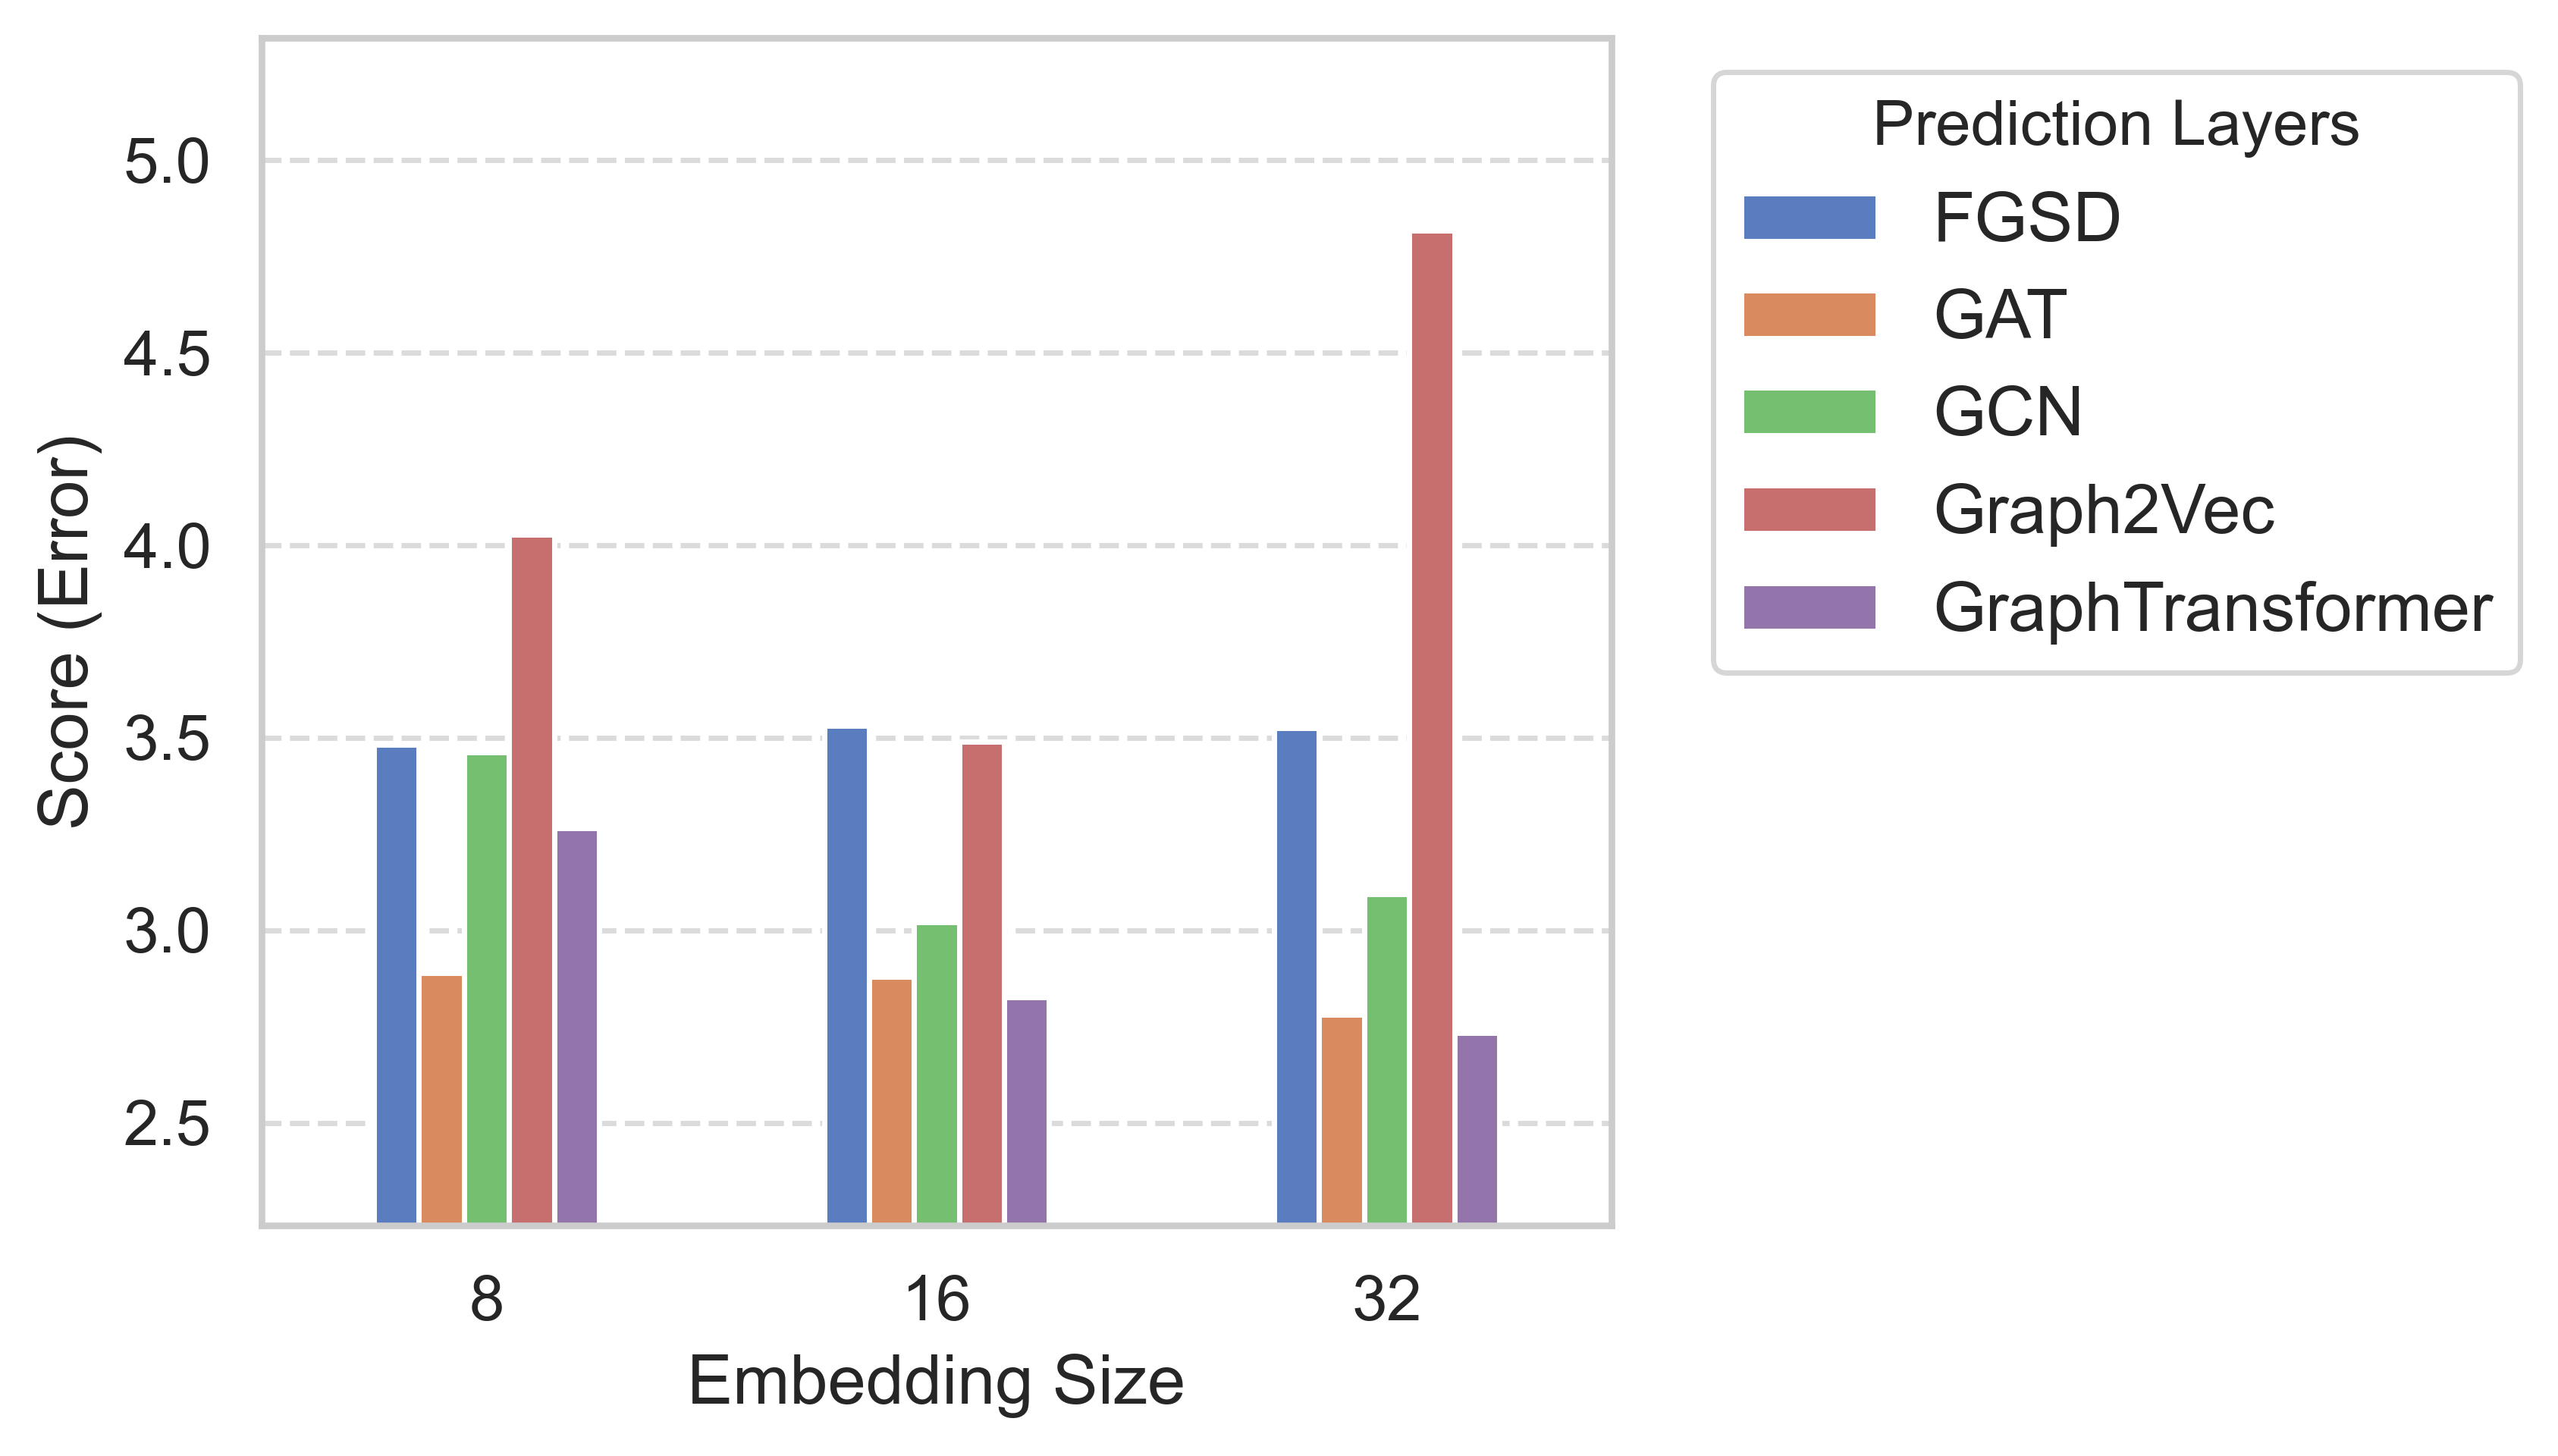

In [6]:
# Aggregate the scores for each graph_layer and embedding_size
x_axis = "embedding_size"
alt_color = "prediction_layer"
color = "graph_layer"
alt_x_axis = "subgraph_size"
gl_vs_emb = results_df.groupby([color, x_axis], as_index=False).agg({"score": "min"})
gl_vs_emb[alt_color] = "Aggregated"
gl_vs_emb[alt_x_axis] = "Aggregated"

# Set seaborn style
sns.set_style("whitegrid")

# Create grouped bar plot
plt.figure(figsize=(7, 4), dpi=500)
ax = sns.barplot(
    data=gl_vs_emb, 
    x=x_axis, 
    y="score", 
    hue=color, 
    dodge=True, 
    width=0.5, 
    palette="muted"
)

# Customize the plot
min_score = gl_vs_emb["score"].min()
max_score = gl_vs_emb["score"].max()

if prediction_task == "num_events":
    plt.ylim(min_score - 0.05, max_score + 0.05)
    #plt.title("BPI'17: Total number of events (Accuracy)", fontsize=12, fontweight="bold")
else:
    plt.ylim(min_score - 0.5, max_score + 0.5)
    #plt.title("BPI'17: Remaining time (MAE in days)", fontsize=12, fontweight="bold")


plt.xlabel("Embedding Size", fontsize=13)
plt.ylabel("Score (Error)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust legend placement to avoid overlap
plt.legend(title="Prediction Layers", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=13, frameon=True)
save_path = f"./figs/{filename}_{color}_{x_axis}"
plt.savefig(save_path, bbox_inches="tight")
print(f"Figure saved to {save_path}")
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Compare Graph embedding techniques/Prediction models over Subgraph Size

Figure saved to ./figs/BPI2017-Final_graph_layer_subgraph_size


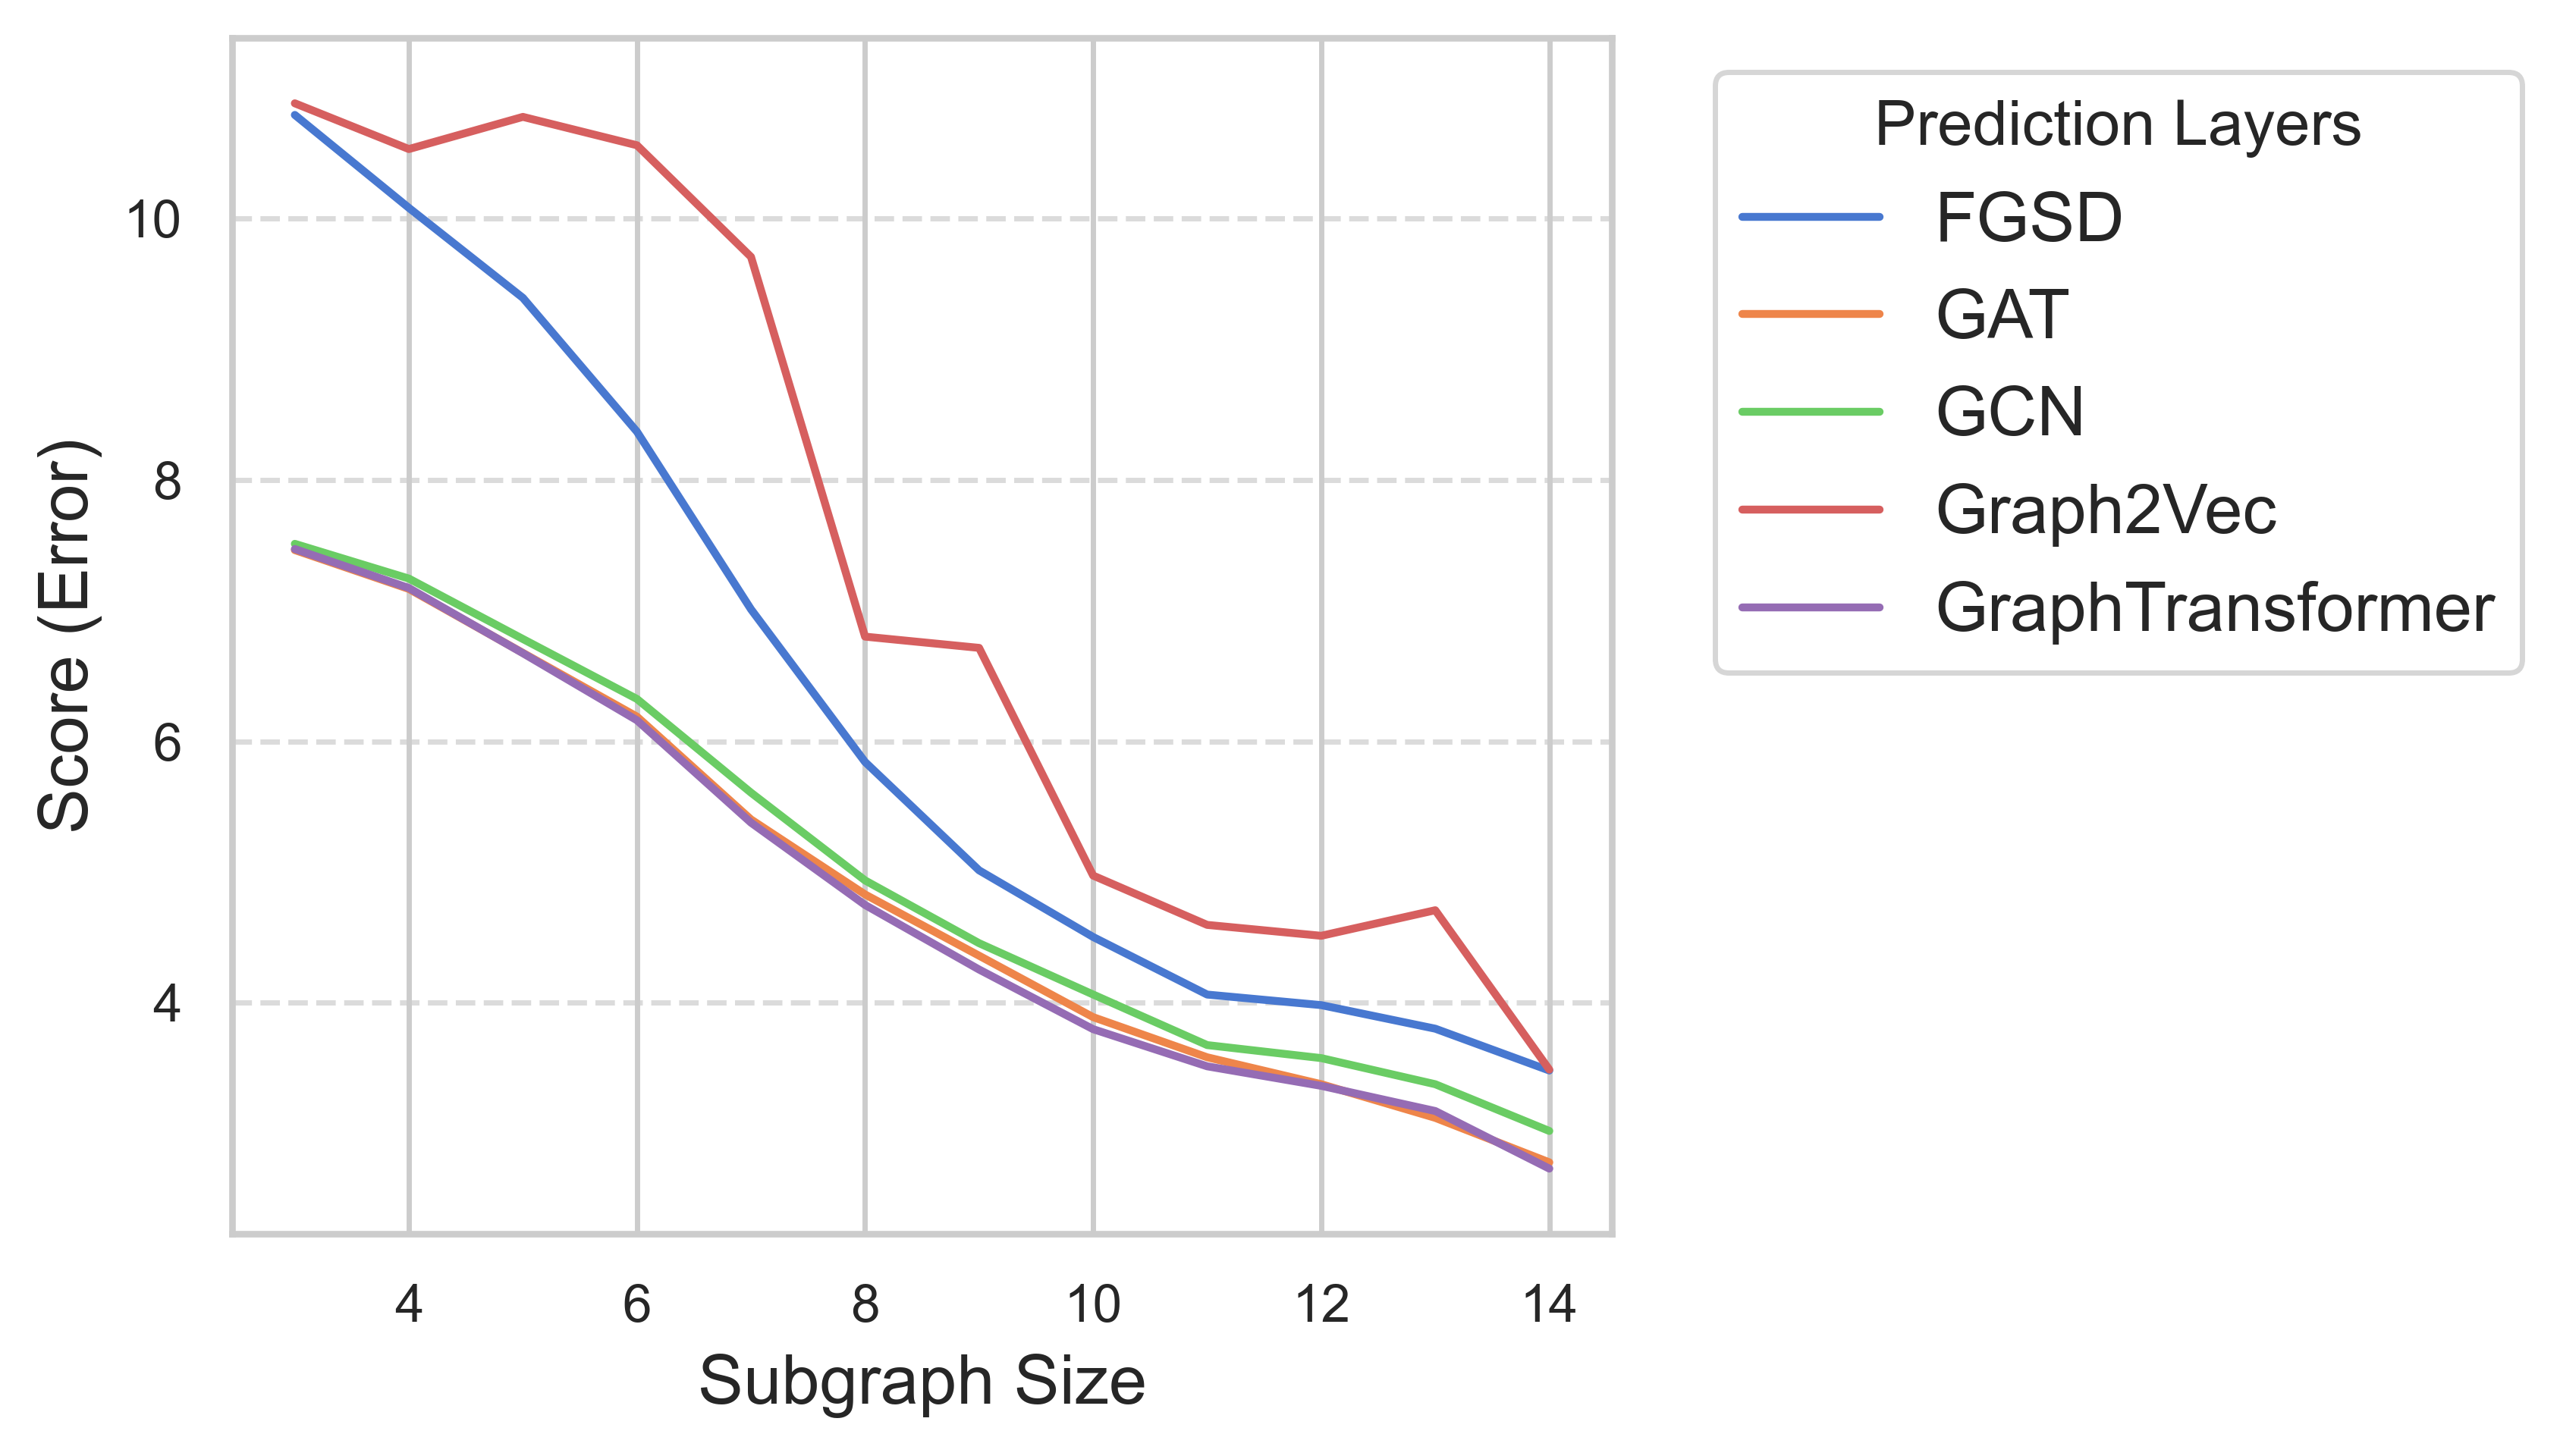

In [7]:
# Aggregate the scores for each graph_layer and embedding_size
alt_x_axis = "embedding_size"
alt_color = "prediction_layer"
color = "graph_layer"
x_axis = "subgraph_size"
gl_vs_emb = results_df.groupby([color, x_axis], as_index=False).agg({"score": "min"})
gl_vs_emb[alt_color] = "Aggregated"
gl_vs_emb[alt_x_axis] = "Aggregated"

# Set seaborn style
sns.set_style("whitegrid")

# Create grouped bar plot
plt.figure(figsize=(7, 4), dpi=500)
ax = sns.lineplot(
    data=gl_vs_emb, 
    x=x_axis, 
    y="score", 
    hue=color, 
    palette="muted"
)

# Customize the plot
min_score = gl_vs_emb["score"].min()
max_score = gl_vs_emb["score"].max()

if prediction_task == "num_events":
    plt.ylim(min_score - 0.05, max_score + 0.05)
    #plt.title("BPI'17: Total number of events (Accuracy)", fontsize=12, fontweight="bold")
else:
    plt.ylim(min_score - 0.5, max_score + 0.5)
    #plt.title("BPI'17: Remaining time (MAE in days)", fontsize=12, fontweight="bold")


plt.xlabel("Subgraph Size", fontsize=13)
plt.ylabel("Score (Error)", fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust legend placement to avoid overlap
plt.legend(title="Prediction Layers", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=13, frameon=True)
save_path = f"./figs/{filename}_{color}_{x_axis}"
plt.savefig(save_path, bbox_inches="tight")
print(f"Figure saved to {save_path}")
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Compare the generalization capacity of neural networks and assess embedding quality

### Number of events Accuracy

In [8]:
def compute_weighted_avg(root_dir, prediction_task, embedding_size, weights_mapping, condition_label, dataset_label):
    results_df = results_to_pd(root_dir, prediction_task)
    res = results_df.loc[results_df['embedding_size'] == embedding_size].copy()
    res['weights'] = res['subgraph_size'].map(weights_mapping)
    weighted_avg = (
        res.groupby(['graph_layer', 'prediction_layer'])
           .apply(lambda group: (group['score'] * group['weights']).sum() / group['weights'].sum())
           .reset_index(name='weighted_score')
    )
    weighted_avg['Training Setup'] = condition_label
    weighted_avg['Dataset'] = dataset_label
    return weighted_avg

# =============================================================================
# Function to aggregate over prediction layers per model
# =============================================================================
def aggregate_by_model(df):
    return df.groupby("graph_layer", as_index=False)['weighted_score'].mean()

# =============================================================================
# Experiment Parameters
# =============================================================================
embedding_size = 32
prediction_task = "num_events"

dataset_name1 = "recruiting-ocel1"
root_dir_transfer1 = os.path.join("results", "exp_3_e", dataset_name1)
root_dir_joint1    = os.path.join("results", "exp_3_e", f"{dataset_name1}-combin")

transfer_label1 = f"Transfer Training ({dataset_name1})"
joint_label1    = f"Joint Training ({dataset_name1})"

weighted_transfer1 = compute_weighted_avg(root_dir_transfer1, prediction_task, embedding_size,
                                          recruiting_weights, transfer_label1, dataset_name1)
weighted_joint1    = compute_weighted_avg(root_dir_joint1, prediction_task, embedding_size,
                                          recruiting_weights, joint_label1, dataset_name1)

transfer_by_model1 = aggregate_by_model(weighted_transfer1)
joint_by_model1    = aggregate_by_model(weighted_joint1)

merged1 = pd.merge(transfer_by_model1, joint_by_model1, on="graph_layer", suffixes=("_transfer", "_joint"))

merged1["Improvement"] = merged1["weighted_score_joint"] - merged1["weighted_score_transfer"]
merged1["Relative Improvement (%)"] = (merged1["Improvement"] / merged1["weighted_score_transfer"]) * 100
merged1["Dataset"] = 'Recruiting'

# =============================================================================
# Dataset 2: ocel2-p2p (if available)
# =============================================================================

dataset_name2 = "ocel2-p2p"
root_dir_transfer2 = os.path.join("results", "exp_3_e", dataset_name2)
root_dir_joint2    = os.path.join("results", "exp_3_e", f"{dataset_name2}-combin")

transfer_label2 = f"Transfer Training ({dataset_name2})"
joint_label2    = f"Joint Training ({dataset_name2})"

weighted_transfer2 = compute_weighted_avg(root_dir_transfer2, prediction_task, embedding_size,
                                          p2p_weights, transfer_label2, dataset_name2)
weighted_joint2    = compute_weighted_avg(root_dir_joint2, prediction_task, embedding_size,
                                          p2p_weights, joint_label2, dataset_name2)

transfer_by_model2 = aggregate_by_model(weighted_transfer2)
joint_by_model2    = aggregate_by_model(weighted_joint2)

merged2 = pd.merge(transfer_by_model2, joint_by_model2, on="graph_layer", suffixes=("_transfer", "_joint"))

merged2["Improvement"] = merged2["weighted_score_joint"] - merged2["weighted_score_transfer"]
merged2["Relative Improvement (%)"] = (merged2["Improvement"] / merged2["weighted_score_transfer"]) * 100
merged2["Dataset"] = 'P2P'


dataset_name3 = "BPI2017-Final"
root_dir_transfer3 = os.path.join("results", "exp_3_e", dataset_name3)
root_dir_joint3    = os.path.join("results", "exp_3_e", f"{dataset_name3}-combin")

transfer_label3 = f"Transfer Training ({dataset_name3})"
joint_label3    = f"Joint Training ({dataset_name3})"

weighted_transfer3 = compute_weighted_avg(root_dir_transfer3, prediction_task, embedding_size,
                                          bpi_weights, transfer_label3, dataset_name3)
weighted_joint3    = compute_weighted_avg(root_dir_joint3, prediction_task, embedding_size,
                                          bpi_weights, joint_label3, dataset_name3)

transfer_by_model3 = aggregate_by_model(weighted_transfer3)
joint_by_model3    = aggregate_by_model(weighted_joint3)

merged3 = pd.merge(transfer_by_model3, joint_by_model3, on="graph_layer", suffixes=("_transfer", "_joint"))

merged3["Improvement"] = merged3["weighted_score_joint"] - merged3["weighted_score_transfer"]
merged3["Relative Improvement (%)"] = (merged3["Improvement"] / merged3["weighted_score_transfer"]) * 100
merged3["Dataset"] = 'BPI17'

# =============================================================================
# Combine results from all datasets
# =============================================================================
all_relative_accuracy = pd.concat([
    merged1[["graph_layer", "weighted_score_transfer", "Improvement", "Relative Improvement (%)", "Dataset"]],
    merged2[["graph_layer", "weighted_score_transfer", "Improvement", "Relative Improvement (%)", "Dataset"]],
    merged3[["graph_layer", "weighted_score_transfer", "Improvement", "Relative Improvement (%)", "Dataset"]]
], ignore_index=True)

sns.set(style="whitegrid")

#### Graph layer on the x-axis and datasets in different colors

NameError: name 'all_relative' is not defined

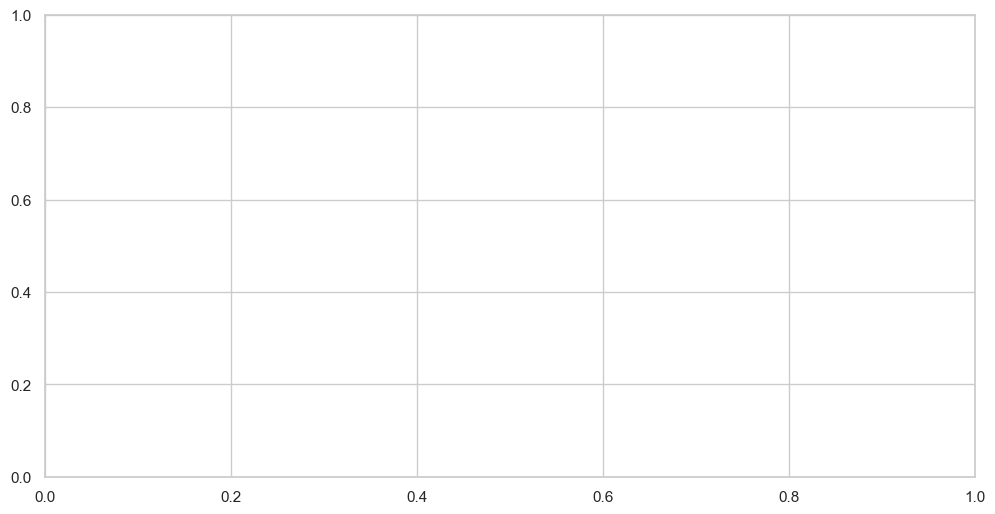

In [9]:
# =============================================================================
# Define Colors & Bar Width
# =============================================================================
dataset_colors = {
    "recruiting-ocel1": "#1f77b4",  # Blue
    "ocel2-p2p": "#2ca02c",  # Green
    "BPI2017-Final": "#d62728"  # Red
}
improvement_color = "#ff7f0e"  # Orange for improvement
bar_width = 0.25  # Offset width to separate dataset bars

# =============================================================================
# Plot Setup
# =============================================================================
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Unique graph layers for proper x-axis positioning
graph_layers = all_relative["graph_layer"].unique()
x_positions = np.arange(len(graph_layers))

# Track positions per dataset
dataset_offsets = {
    "recruiting-ocel1": -bar_width,
    "ocel2-p2p": 0,
    "BPI2017-Final": bar_width
}

# =============================================================================
# Plot Transfer Scores & Improvements
# =============================================================================
for dataset, offset in dataset_offsets.items():
    dataset_df = all_relative[all_relative["Dataset"] == dataset]
    x_shifted = x_positions + offset

    # Base Transfer Score bars
    ax.bar(x_shifted, dataset_df["weighted_score_transfer"], color=dataset_colors[dataset], 
           width=bar_width, edgecolor='black', label=f"Transfer ({dataset})")
    
    # Overlay Improvement bars
    for i, (idx, row) in enumerate(dataset_df.iterrows()):
        base_score = row["weighted_score_transfer"]
        improvement = row["Improvement"]
        relative_imp = row["Relative Improvement (%)"]

        if improvement > 0:
            ax.bar(x_shifted[i], improvement, bottom=base_score, color=improvement_color, 
                   width=bar_width, edgecolor='black', alpha=0.9)
            ax.text(x_shifted[i], base_score + improvement + 0.005, f"{relative_imp:.1f}%", 
                    ha='center', fontsize=10, fontweight='bold', color='black')

# =============================================================================
# Custom Legend
# =============================================================================
from matplotlib.pyplot import Line2D
handles = [
    Line2D([0], [0], color=dataset_colors["recruiting-ocel1"], lw=6, label="Recruiting - Transfer Score"),
    Line2D([0], [0], color=dataset_colors["ocel2-p2p"], lw=6, label="P2P - Transfer Score"),
    Line2D([0], [0], color=dataset_colors["BPI2017-Final"], lw=6, label="BPI17 - Transfer Score"),
    Line2D([0], [0], color=improvement_color, lw=6, label="Improvement")
]
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.02, 1))

# =============================================================================
# Final Formatting
# =============================================================================
plt.ylabel("Prediction Accuracy")
plt.xlabel("Graph Layer (Model)")
plt.xticks(x_positions, graph_layers, rotation=30)
plt.tight_layout()

plt.show()

#### Datasets on the x-axis and graph layers in different colors

In [10]:
# =============================================================================
# Setup for Grouped Bar Chart: Datasets on x-axis, Graph Layers as Colors
# =============================================================================
# Determine the unique datasets and graph layers
datasets = all_relative["Dataset"].unique()
unique_layers = sorted(all_relative["graph_layer"].unique())

# Create a color palette for the graph layers
palette = sns.color_palette("Set1", len(unique_layers))
graph_layer_colors = {layer: palette[i] for i, layer in enumerate(unique_layers)}

# Define bar width and positions for grouped bars
bar_width = 0.2  # width of each bar
x_positions = np.arange(len(datasets))  # one position per dataset

plt.figure(figsize=(12, 6))
ax = plt.gca()

# To avoid duplicate labels in the legend
plotted_layers = {}

# Loop over each dataset group
for i, dataset in enumerate(datasets):
    dataset_df = all_relative[all_relative["Dataset"] == dataset]
    # Number of graph layers (bars) in this dataset group
    n_layers = len(dataset_df)
    # Calculate offsets so that the bars are centered at x_positions[i]
    offsets = np.linspace(-bar_width*(n_layers-1)/2, bar_width*(n_layers-1)/2, n_layers)
    
    # Sort dataset_df by graph_layer to ensure consistent color assignment
    dataset_df = dataset_df.sort_values("graph_layer")
    
    # Loop through each row in the group
    for j, (idx, row) in enumerate(dataset_df.iterrows()):
        x = x_positions[i] + offsets[j]
        layer = row["graph_layer"]
        base_score = row["weighted_score_transfer"]
        improvement = row["Improvement"]
        relative_imp = row["Relative Improvement (%)"]
        
        # Plot the base Transfer Score bar with the color corresponding to the graph layer
        label = graph_layer_colors[layer] if layer in plotted_layers else layer
        bar = ax.bar(x, base_score, 
                     width=bar_width, 
                     color=graph_layer_colors[layer], 
                     edgecolor='black',
                     label=layer if layer not in plotted_layers else None)
        plotted_layers[layer] = True

        # If improvement is positive, overlay the improvement bar
        if improvement > 0:
            ax.bar(x, improvement, bottom=base_score, 
                   width=bar_width, 
                   color="#ff7f0e",  # improvement overlay color
                   edgecolor='black', 
                   alpha=0.9)
            # Add text above the bar to indicate relative improvement percentage
            ax.text(x, base_score + improvement + 0.005, f"{relative_imp:.1f}%", 
                    ha='center', fontsize=10, fontweight='bold', color='black')

# =============================================================================
# Custom Legend
# =============================================================================
# Create custom legend handles for graph layers
from matplotlib.patches import Patch
layer_handles = [Patch(facecolor=graph_layer_colors[layer], edgecolor='black', label=f"{layer}")
                 for layer in unique_layers]
improvement_handle = Patch(facecolor="#ff7f0e", edgecolor='black', label="Joint Learning Improvement")

# Place the legend outside the plot
ax.legend(handles=layer_handles + [improvement_handle], loc='upper left', bbox_to_anchor=(1.02, 1))

# =============================================================================
# Final Formatting
# =============================================================================
plt.ylabel("Prediction Accuracy")
plt.xlabel("Dataset")
plt.xticks(x_positions, datasets)
# plt.title("Prediction Scores with (Improvements by Dataset and Graph Layer")
plt.tight_layout()
save_path = f"./figs/generalization_{prediction_task}"
plt.savefig(save_path, bbox_inches="tight")
print(f"Figure saved to {save_path}")
plt.show()

NameError: name 'all_relative' is not defined

### Remaining Time MAE

In [11]:
def compute_weighted_avg(root_dir, prediction_task, embedding_size, weights_mapping, condition_label, dataset_label):
    results_df = results_to_pd(root_dir, prediction_task)
    res = results_df.loc[results_df['embedding_size'] == embedding_size].copy()
    res['weights'] = res['subgraph_size'].map(weights_mapping)
    weighted_avg = (
        res.groupby(['graph_layer', 'prediction_layer'])
           .apply(lambda group: (group['score'] * group['weights']).sum() / group['weights'].sum())
           .reset_index(name='weighted_score')
    )
    weighted_avg['Training Setup'] = condition_label
    weighted_avg['Dataset'] = dataset_label
    return weighted_avg

# =============================================================================
# Function to aggregate over prediction layers per model
# =============================================================================
def aggregate_by_model(df):
    return df.groupby("graph_layer", as_index=False)['weighted_score'].mean()

# =============================================================================
# Experiment Parameters
# =============================================================================
embedding_size = 32
prediction_task = "remaining_time"

dataset_name1 = "recruiting-ocel1"
root_dir_transfer1 = os.path.join("results", "exp_3_r", dataset_name1)
root_dir_joint1    = os.path.join("results", "exp_3_r", f"{dataset_name1}-combin")

transfer_label1 = f"Transfer Training ({dataset_name1})"
joint_label1    = f"Joint Training ({dataset_name1})"

weighted_transfer1 = compute_weighted_avg(root_dir_transfer1, prediction_task, embedding_size,
                                          recruiting_weights, transfer_label1, dataset_name1)
weighted_joint1    = compute_weighted_avg(root_dir_joint1, prediction_task, embedding_size,
                                          recruiting_weights, joint_label1, dataset_name1)

transfer_by_model1 = aggregate_by_model(weighted_transfer1)
joint_by_model1    = aggregate_by_model(weighted_joint1)

merged1 = pd.merge(transfer_by_model1, joint_by_model1, on="graph_layer", suffixes=("_transfer", "_joint"))

merged1["Improvement"] = - merged1["weighted_score_joint"] + merged1["weighted_score_transfer"]
merged1["Relative Improvement (%)"] = (merged1["Improvement"] / merged1["weighted_score_transfer"]) * 100
merged1["Dataset"] = 'Recruiting'

# =============================================================================
# Dataset 2: ocel2-p2p (if available)
# =============================================================================

dataset_name2 = "ocel2-p2p"
root_dir_transfer2 = os.path.join("results", "exp_3_r", dataset_name2)
root_dir_joint2    = os.path.join("results", "exp_3_r", f"{dataset_name2}-combin")

transfer_label2 = f"Transfer Training ({dataset_name2})"
joint_label2    = f"Joint Training ({dataset_name2})"

weighted_transfer2 = compute_weighted_avg(root_dir_transfer2, prediction_task, embedding_size,
                                          p2p_weights, transfer_label2, dataset_name2)
weighted_joint2    = compute_weighted_avg(root_dir_joint2, prediction_task, embedding_size,
                                          p2p_weights, joint_label2, dataset_name2)

transfer_by_model2 = aggregate_by_model(weighted_transfer2)
joint_by_model2    = aggregate_by_model(weighted_joint2)

merged2 = pd.merge(transfer_by_model2, joint_by_model2, on="graph_layer", suffixes=("_transfer", "_joint"))

merged2["Improvement"] = - merged2["weighted_score_joint"] + merged2["weighted_score_transfer"]
merged2["Relative Improvement (%)"] = (merged2["Improvement"] / merged2["weighted_score_transfer"]) * 100
merged2["Dataset"] = 'P2P'

dataset_name3 = "BPI2017-Final"
root_dir_transfer3 = os.path.join("results", "exp_3_r", dataset_name3)
root_dir_joint3    = os.path.join("results", "exp_3_r", f"{dataset_name3}-combin")

transfer_label3 = f"Transfer Training ({dataset_name3})"
joint_label3    = f"Joint Training ({dataset_name3})"

weighted_transfer3 = compute_weighted_avg(root_dir_transfer3, prediction_task, embedding_size,
                                          bpi_weights, transfer_label3, dataset_name3)
weighted_joint3    = compute_weighted_avg(root_dir_joint3, prediction_task, embedding_size,
                                          bpi_weights, joint_label3, dataset_name3)

transfer_by_model3 = aggregate_by_model(weighted_transfer3)
joint_by_model3    = aggregate_by_model(weighted_joint3)

merged3 = pd.merge(transfer_by_model3, joint_by_model3, on="graph_layer", suffixes=("_transfer", "_joint"))

merged3["Improvement"] = - merged3["weighted_score_joint"] + merged3["weighted_score_transfer"]
merged3["Relative Improvement (%)"] = (merged3["Improvement"] / merged3["weighted_score_transfer"]) * 100
merged3["Dataset"] = 'BPI17'

# =============================================================================
# Combine results from all datasets
# =============================================================================
all_relative_error = pd.concat([
    merged1[["graph_layer", "weighted_score_transfer","weighted_score_joint", "Improvement", "Relative Improvement (%)", "Dataset"]],
    merged2[["graph_layer", "weighted_score_transfer","weighted_score_joint" ,"Improvement", "Relative Improvement (%)", "Dataset"]],
    merged3[["graph_layer", "weighted_score_transfer", "weighted_score_joint","Improvement", "Relative Improvement (%)", "Dataset"]]
], ignore_index=True)

sns.set(style="whitegrid")

#### Graph layer on the x-axis and datasets in different colors

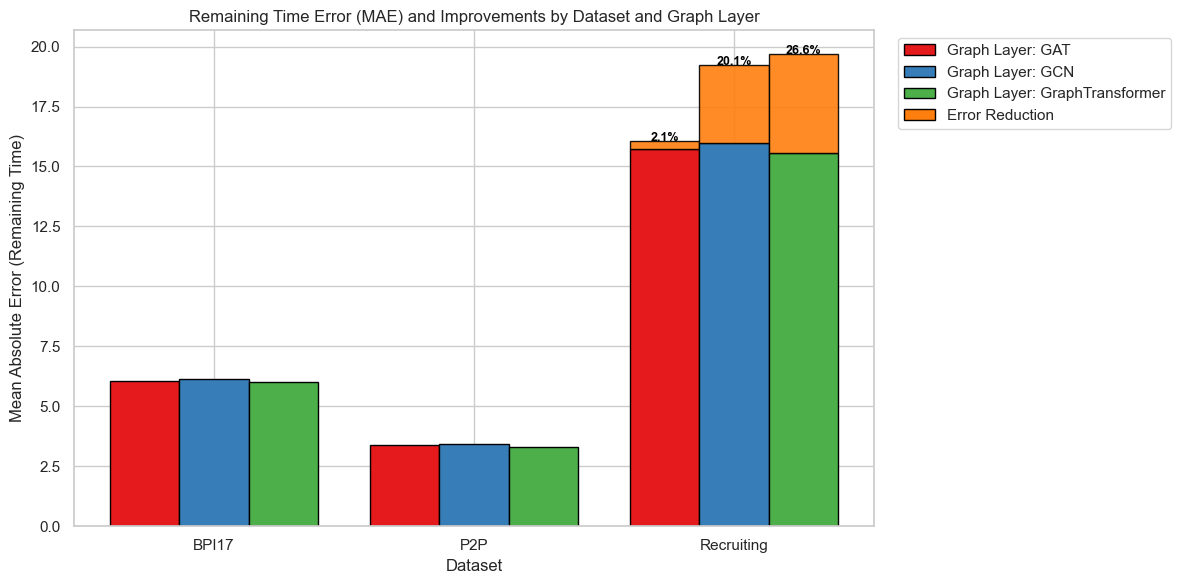

Figure saved to ./figs/generalization_number_events


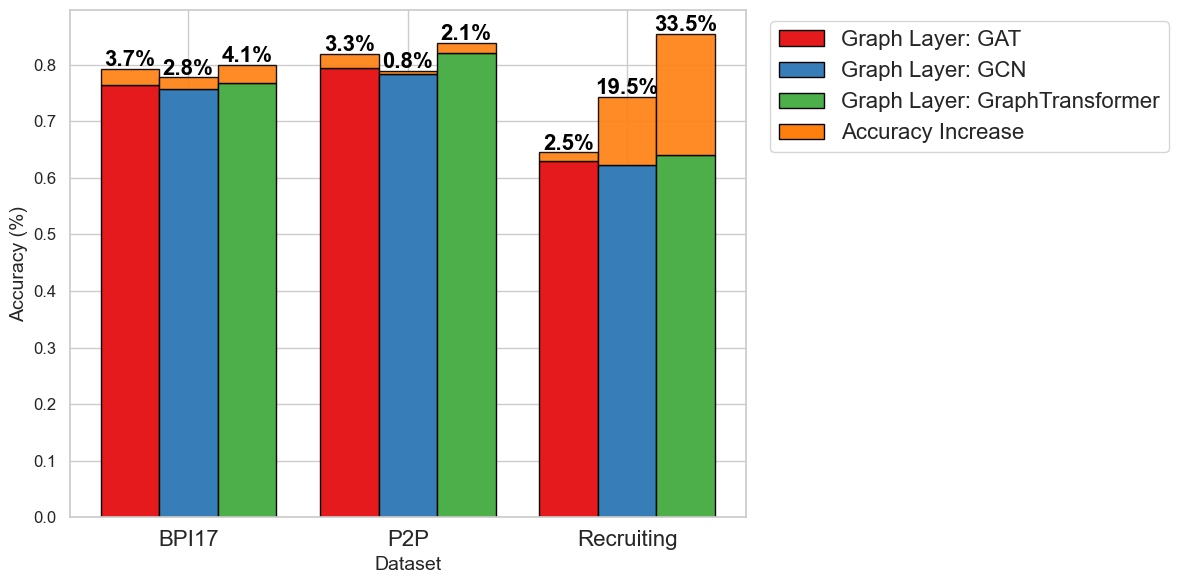

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

sns.set(style="whitegrid")

# =============================================================================
# Common Settings for Both Figures
# =============================================================================

# Datasets (x-axis groups) and graph layers (colors)
# (Assuming both DataFrames contain the same datasets and graph layers.)
datasets = sorted(all_relative_error["Dataset"].unique())
datasets_names = {}
unique_layers = sorted(all_relative_error["graph_layer"].unique())

# Create a color palette for graph layers (use the same palette for both figures)
palette = sns.color_palette("Set1", len(unique_layers))
layer_colors = {layer: palette[i] for i, layer in enumerate(unique_layers)}

# Bar parameters:
group_width = 0.8         # Total width allocated for each dataset group
n_layers = len(unique_layers)
bar_width = group_width / n_layers  # Width of each individual bar

# Horizontal positions for each dataset group
x_positions = np.arange(len(datasets))

# =============================================================================
# Figure 2: Number of Events Accuracy
# =============================================================================
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Loop over each dataset group
for i, dataset in enumerate(datasets):
    # Filter rows for the current dataset and order by graph layer
    df_dataset = all_relative_accuracy[all_relative_accuracy["Dataset"] == dataset]
    df_dataset = df_dataset.set_index("graph_layer").reindex(unique_layers).reset_index()
    
    # Compute offsets so that the bars are centered in each dataset group
    offsets = np.linspace(-group_width/2 + bar_width/2, group_width/2 - bar_width/2, n_layers)
    
    # Loop through each graph layer for this dataset
    for j, row in df_dataset.iterrows():
        x = x_positions[i] + offsets[j]
        transfer_acc = row["weighted_score_transfer"]  # Transfer accuracy (%)
        improvement = row["Improvement"]                # Joint Accuracy - Transfer Accuracy
        rel_imp = row["Relative Improvement (%)"]
        layer = row["graph_layer"]
        color = layer_colors[layer]
        
        # Plot the base Transfer accuracy bar.
        ax.bar(x, transfer_acc, width=bar_width,
               color=color, edgecolor='black',
               label=layer if i == 0 else None)
        
        # Overlay the improvement (if Joint Accuracy is higher than Transfer Accuracy)
        if improvement > 0:
            ax.bar(x, improvement, width=bar_width, bottom=transfer_acc,
                   color="#ff7f0e", edgecolor='black', alpha=0.9)
            ax.text(x, transfer_acc + improvement + 0.005, f"{rel_imp:.1f}%",
                    ha="center", fontsize=16, fontweight="bold", color='black')

# Custom legend for graph layers and improvement overlay
legend_elements = [Patch(facecolor=layer_colors[layer], edgecolor='black', 
                         label=f"Graph Layer: {layer}") for layer in unique_layers]
legend_elements.append(Patch(facecolor="#ff7f0e", edgecolor='black', 
                             label="Accuracy Increase"))
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=16)

# Format the Accuracy figure
plt.ylabel("Accuracy (%)")
plt.xlabel("Dataset")
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.xticks(x_positions, datasets, fontsize=16)
plt.yticks(fontsize=12)
#plt.title("Number of Events Accuracy and Improvements by Dataset and Graph Layer")
plt.tight_layout()
save_path = f"./figs/generalization_number_events"
plt.savefig(save_path, bbox_inches="tight")
print(f"Figure saved to {save_path}")
plt.show()


In [ ]:
merged2.head()